# find inception score for mean images

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [3]:
import ld_gan
import numpy as np
from ld_gan import visualize
BATCH_SIZE = 256

In [4]:
# load models
enc = ld_gan.utils.model_handler.load_model("xf_11111_s10l.py", 650, "enc")
gen = ld_gan.utils.model_handler.load_model("xf_11111_s10l.py", 650, "gen")

/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.enc.Enc' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'ld_gan.models.gen.Gen' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


loaded model 'projects/xf_11111_s10l.py/model/e_0650.pth'
loaded model 'projects/xf_11111_s10l.py/model/g_0650.pth'


In [5]:
# load data
X, Y = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)
n_classes = Y.shape[1]
Y = np.argmax(Y, axis = 1)

100%|██████████| 102/102 [00:13<00:00,  7.71it/s]

load data from '/export/home/oblum/projects/ls_gan/data/flowers_102/jpg_128'


In [6]:
z_enc = ld_gan.utils.model_handler.apply_model(enc, X)

In [7]:
sampler = ld_gan.sample.nn_sampler_life(enc, X, Y, BATCH_SIZE, n_jobs=15)

In [8]:
x_fake = np.zeros((0,X.shape[1],X.shape[2],X.shape[3]))

while len(x_fake) < len(X):
    _, _, Z, _ = sampler.next()
    imgs_fake = ld_gan.utils.model_handler.apply_model(gen, Z)
    x_fake = np.concatenate((x_fake, imgs_fake))

In [9]:
x_fake = x_fake[:len(X)]

# compute inception score

In [10]:
score_fkt = ld_gan.eval_gan.InceptionScore()

/net/hciserver03/storage/oblum/venvs/compvisgpu02/lib/python2.7/site-packages/torchvision/models/inception.py:65: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  m.weight.data.copy_(values)


In [11]:
score_fkt.score(x_fake)

compute inception score...


(3.3158276, 0.066780843)

In [12]:
score_fkt = ld_gan.eval_gan.InceptionModeScore(real_data_score=3.54)

In [13]:
score_fkt.score(x_fake, X)

(3.3158271, 0.066780843)

<IPython.core.display.Javascript object>


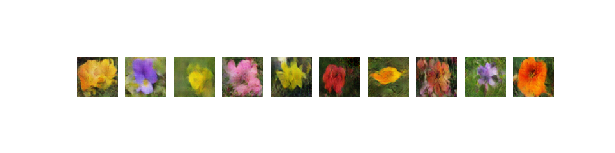

In [15]:
visualize.disp(x_fake[:10])

In [16]:
3.3158271 / 3.54

0.9366743220338982